In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [2]:
#import data
df= pd.read_excel(r'/Users/jessiecai/Desktop/筆試題目/3-3.xlsx')
df.head()

,date,price,quote,volume,fi_over,fi_per,cr_over,se_over,finan_diff,lend_diff,over_1000
0,2020-08-07,294.0,1.38,53375.0,-6892.0,59.2,2926.00,-127.0,537.0,-52,65.83
1,2020-07-31,290.0,6.81,41697.0,3370.0,60.5,2173.00,294.0,199.0,29,65.78
2,2020-07-24,271.5,3.63,34273.0,-1271.0,59.9,781.00,-1175.0,185.0,159,66.61
3,2020-07-17,262.0,-4.73,29666.0,7844.0,59.9,-9.73,-1589.0,847.0,47,67.58
4,2020-07-10,285.5,9.60,58458.0,-9398.0,58.4,2487.00,-21.0,562.0,103,68.35


In [3]:
data=df.drop(['date'], axis=1)
data.index=df.date

In [4]:
# 缺失值處理
data[data.isnull().values==True] 

df_na= data.dropna(axis=0)
df1=df_na.reindex(index=df_na.index[::-1])
df1.tail()

,price,quote,volume,fi_over,fi_per,cr_over,se_over,finan_diff,lend_diff,over_1000
date,,,,,,,,,,
2020-07-10,285.5,9.60,58458.0,-9398.0,58.4,2487.00,-21.0,562.0,103,68.35
2020-07-17,262.0,-4.73,29666.0,7844.0,59.9,-9.73,-1589.0,847.0,47,67.58
2020-07-24,271.5,3.63,34273.0,-1271.0,59.9,781.00,-1175.0,185.0,159,66.61
2020-07-31,290.0,6.81,41697.0,3370.0,60.5,2173.00,294.0,199.0,29,65.78
2020-08-07,294.0,1.38,53375.0,-6892.0,59.2,2926.00,-127.0,537.0,-52,65.83


//anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


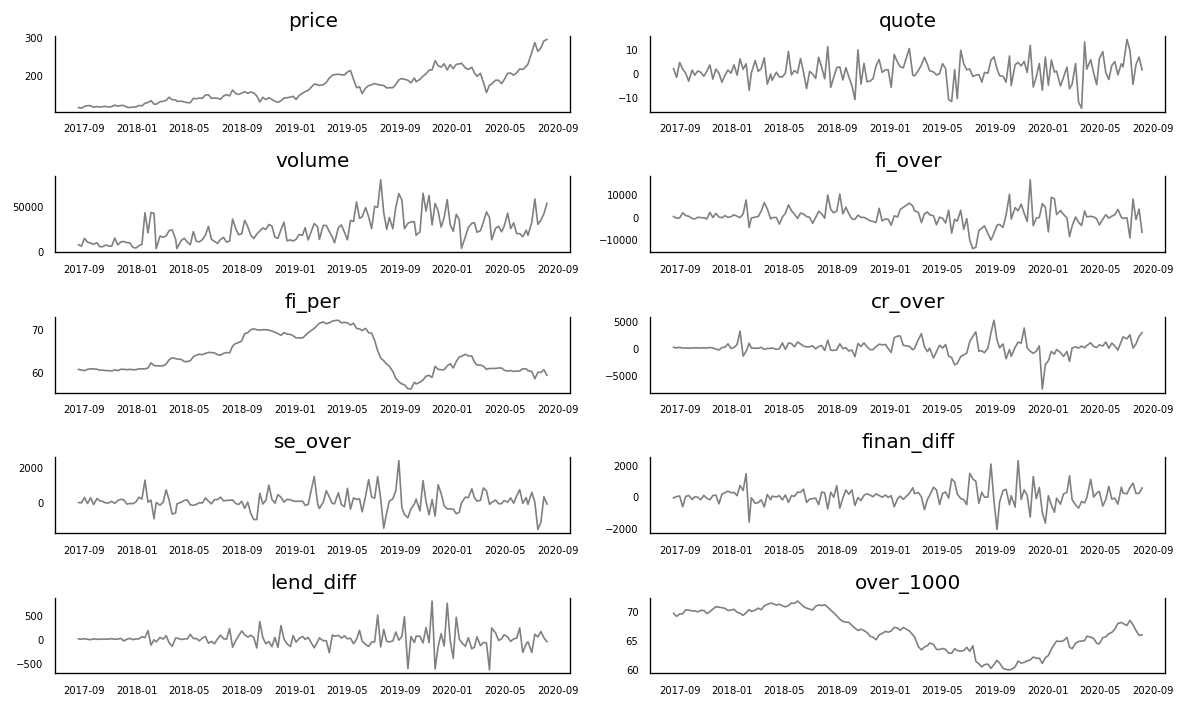

In [5]:
# Plot
fig, axes= plt.subplots(nrows=5, ncols=2, dpi=120, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    data1=df1[df1.columns[i]]
    ax.plot(data1, color='grey', linewidth=1)
    ax.set_title(df1.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)
plt.tight_layout()

In [6]:
# Granger's Causality Test
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test= 'ssr_chi2test'
def granger_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    df= pd.DataFrame(np.zeros((len(variables), len(variables))), columns= variables, index= variables)
    for c in df.columns:
        for r in df.index:
            test_result= grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values= [round(test_result[i+1][0][test][1], 4) for i in range(maxlag)]
            if verbose: print(f'Y={r}, X={c}, P Value={p_values}')
            min_p_value=np.min(p_values)
            df.loc[r, c]=min_p_value
    df.columns= [var+'_x' for var in variables]
    df.index= [var+'_y' for var in variables]
    return df

gcm=granger_causation_matrix(df1, variables= df1.columns)
gcm

,price_x,quote_x,volume_x,fi_over_x,fi_per_x,cr_over_x,se_over_x,finan_diff_x,lend_diff_x,over_1000_x
price_y,1.0000,0.3148,0.0590,0.0723,0.0544,0.0000,0.2840,0.3382,0.0002,0.0819
quote_y,0.4166,1.0000,0.0976,0.0690,0.0634,0.0018,0.2114,0.4411,0.0004,0.1309
volume_y,0.0001,0.1138,1.0000,0.0028,0.0027,0.0261,0.0027,0.0000,0.0315,0.0000
fi_over_y,0.1104,0.0549,0.0545,1.0000,0.1121,0.0002,0.2567,0.0520,0.0000,0.0783
fi_per_y,0.1197,0.0346,0.0316,0.0016,1.0000,0.0006,0.1251,0.1187,0.0000,0.0131
cr_over_y,0.1055,0.1667,0.0746,0.0039,0.0078,1.0000,0.1178,0.2025,0.0050,0.3387
se_over_y,0.1303,0.1537,0.0002,0.0572,0.0020,0.0335,1.0000,0.0408,0.0282,0.1671
finan_diff_y,0.3085,0.3564,0.1126,0.2316,0.1194,0.0244,0.1519,1.0000,0.0375,0.6851
lend_diff_y,0.1446,0.1893,0.0006,0.0593,0.1462,0.0507,0.0006,0.0000,1.0000,0.0412
over_1000_y,0.0366,0.0219,0.0073,0.0918,0.0247,0.0110,0.1584,0.0035,0.2719,1.0000


In [7]:
# Cointergration Test
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointergration_test(df, alpha=0.05):
    out= coint_johansen(df, -1, 5)
    d= {'0.90':0, '0.95':1, '0.99':2}
    traces= out.lr1
    cvts= out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length=6): return str(val).ljust(length)
    
    print('Name :: Test Stat >  C(95%)  =>  Signif')
    for col, trace, cvt in zip(df1.columns, traces, cvts):
        print(adjust(col), '::', adjust(round(trace, 2), 9), ">", adjust(cvt, 8), '=>', trace>cvt)

cointergration_test(df1)

Name :: Test Stat >  C(95%)  =>  Signif
price  :: 392.22    > 219.4051 => True
quote  :: 284.14    > 179.5199 => True
volume :: 195.62    > 143.6691 => True
fi_over :: 136.05    > 111.7797 => True
fi_per :: 92.26     > 83.9383  => True
cr_over :: 57.14     > 60.0627  => False
se_over :: 24.33     > 40.1749  => False
finan_diff :: 9.36      > 24.2761  => False
lend_diff :: 4.18      > 12.3212  => False
over_1000 :: 1.89      > 4.1296   => False


In [8]:
nobs=20
df_train, df_test= df1[0:-20], df1[-nobs: ]
df_train.shape #(133, 10)
df_test.shape #(20, 10)

(20, 10)

In [9]:
# ADF Test
def adfuller_test(series, signif= 0.05, name='', verbose=False):
    r= adfuller(series, autolag='AIC')
    output= {'test_statistic': round(r[0], 4), 'pvalue': round(r[1], 4), 'n_lags': round(r[2],4), 'n_obs': r[3]}
    p_value= output['pvalue']
    def adjust(val, length=6): return str(val).ljust(length)
    
    print(f' Augmented Dickey-Fuller Test on "{name}"', "\n", "-"*47)
    print(f' Null Hypothesis: Data has until root. Non-Stationary. ')
    print(f' Significance Level   = {signif}')
    print(f' Test Statistic          = {output["test_statistic"]}')
    print(f' No. Lags Chosen     = {output["n_lags"]}')
          
    if p_value <= signif:
        print(f' => P-Value ={p_value}. Rejecting Null Hypothesis')
        print(f' => Series is Stationary')
    else:
        print(f' => P-Value={p_value}. Weak evidence to reject the Null Hypothesis')
        print(f' => Series is Non-Stationary.')

# ADF Test on each columns
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')
          
#None of the time series is stationary

 Augmented Dickey-Fuller Test on "price" 
 -----------------------------------------------
 Null Hypothesis: Data has until root. Non-Stationary. 
 Significance Level   = 0.05
 Test Statistic          = -1.6569
 No. Lags Chosen     = 0
 => P-Value=0.4534. Weak evidence to reject the Null Hypothesis
 => Series is Non-Stationary.


 Augmented Dickey-Fuller Test on "quote" 
 -----------------------------------------------
 Null Hypothesis: Data has until root. Non-Stationary. 
 Significance Level   = 0.05
 Test Statistic          = -12.0089
 No. Lags Chosen     = 0
 => P-Value =0.0. Rejecting Null Hypothesis
 => Series is Stationary


 Augmented Dickey-Fuller Test on "volume" 
 -----------------------------------------------
 Null Hypothesis: Data has until root. Non-Stationary. 
 Significance Level   = 0.05
 Test Statistic          = -2.7154
 No. Lags Chosen     = 3
 => P-Value=0.0714. Weak evidence to reject the Null Hypothesis
 => Series is Non-Stationary.


 Augmented Dickey-Fuller Te

In [10]:
# 1st differece
df_differenced= df_train.diff().dropna()

#ADF Test on each colun of 1st Differemces Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

 Augmented Dickey-Fuller Test on "price" 
 -----------------------------------------------
 Null Hypothesis: Data has until root. Non-Stationary. 
 Significance Level   = 0.05
 Test Statistic          = -11.7263
 No. Lags Chosen     = 0
 => P-Value =0.0. Rejecting Null Hypothesis
 => Series is Stationary


 Augmented Dickey-Fuller Test on "quote" 
 -----------------------------------------------
 Null Hypothesis: Data has until root. Non-Stationary. 
 Significance Level   = 0.05
 Test Statistic          = -5.4075
 No. Lags Chosen     = 10
 => P-Value =0.0. Rejecting Null Hypothesis
 => Series is Stationary


 Augmented Dickey-Fuller Test on "volume" 
 -----------------------------------------------
 Null Hypothesis: Data has until root. Non-Stationary. 
 Significance Level   = 0.05
 Test Statistic          = -7.1593
 No. Lags Chosen     = 6
 => P-Value =0.0. Rejecting Null Hypothesis
 => Series is Stationary


 Augmented Dickey-Fuller Test on "fi_over" 
 -------------------------------

In [11]:
# Select the order
model= VAR(df_differenced)
for i in range(10):
    result= model.fit(i)
    print('Lag Order= ', i)
    print('AIC: ', result.aic)
    print('BIC: ', result.bic)
    print('FPE: ', result.fpe)
    print('HQIC: ', result.hqic, '\n')
#use lag 9 model 

Lag Order=  0
AIC:  91.42306647019015
BIC:  91.63932317167902
FPE:  5.064475680841576e+39
HQIC:  91.5109462091092 

Lag Order=  1
AIC:  85.38916787725942
BIC:  87.7796821938338
FPE:  1.2181175149879195e+37
HQIC:  86.36058151189522 

Lag Order=  2
AIC:  84.3189677159737
BIC:  88.90524350190655
FPE:  4.2766217499768195e+36
HQIC:  86.18261977821047 

Lag Order=  3
AIC:  83.22192264799847
BIC:  90.02582471053555
FPE:  1.5224126788664582e+36
HQIC:  85.98665211146822 

Lag Order=  4
AIC:  82.952964317996
BIC:  91.9967268155867
FPE:  1.3264159498229301e+36
HQIC:  86.62774723667404 

Lag Order=  5
AIC:  82.38299871746003
BIC:  93.68923380447129
FPE:  9.469006206810295e+35
HQIC:  86.976950918907 

Lag Order=  6
AIC:  81.52082135533621
BIC:  95.11252808182813
FPE:  5.868722964238928e+35
HQIC:  87.04320118922567 

Lag Order=  7
AIC:  81.05176701016026
BIC:  96.95234048563742
FPE:  6.748631831821994e+35
HQIC:  87.51197815267125 

Lag Order=  8
AIC:  79.02155337189964
BIC:  97.254794202302
FPE:  2.

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [12]:
model_fitted=model.fit(9)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 15, Aug, 2020
Time:                     14:14:42
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                    96.4811
Nobs:                     125.000    HQIC:                   84.2557
Log likelihood:          -5606.86    FPE:                4.62862e+34
AIC:                      75.8910    Det(Omega_mle):     1.94991e+32
--------------------------------------------------------------------
Results for equation price
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.914852         0.753457            1.214           0.225
L1.price              1.567817         0.779676            2.011           0.044
L1.quote             -2.387051         1.341852           -1

In [13]:
#DW
from statsmodels.stats.stattools import durbin_watson
def adjust(val, length=6): return str(val).ljust(length)
out= durbin_watson(model_fitted.resid)

for col, val in zip(df1.columns, out):
    print(adjust(col), ':', round(val, 2))

price  : 1.83
quote  : 1.83
volume : 1.94
fi_over : 1.94
fi_per : 1.92
cr_over : 2.05
se_over : 1.94
finan_diff : 1.69
lend_diff : 1.82
over_1000 : 1.98


In [14]:
# Get the lag order
lag_order= model_fitted.k_ar

#Input data for forecasting
forecast_input= df_differenced.values[-lag_order:]
forecast_input

array([[ 2.0000e+00,  4.4000e-01, -3.2180e+04, -6.9750e+03,  1.0000e-01,
         8.9400e+02,  5.3500e+02,  8.9600e+02, -6.9000e+01,  5.3000e-01],
       [-1.2500e+01, -6.3000e+00,  1.2831e+04,  1.8350e+03,  5.0000e-01,
        -5.6500e+02,  3.3300e+02, -3.8100e+02, -8.3000e+01, -5.0000e-02],
       [-4.0000e+00,  3.5900e+00,  1.0790e+04, -1.7920e+03, -4.0000e-01,
        -7.4200e+02, -2.7000e+01,  6.4200e+02,  1.7800e+02,  1.1000e-01],
       [ 5.5000e+00,  4.4000e+00,  4.5680e+03, -1.4770e+03,  0.0000e+00,
         9.2600e+02,  5.0700e+02,  1.0200e+02, -2.3100e+02,  5.8000e-01],
       [-1.4500e+01, -9.1800e+00,  6.3200e+02, -8.3440e+03, -1.4000e+00,
        -1.8610e+03, -5.0500e+02,  1.0510e+03,  3.5000e+01, -1.6700e+00],
       [-9.5000e+00,  1.9800e+00, -1.0775e+04,  4.6950e+03, -7.0000e-01,
         2.5090e+03, -2.0300e+02, -1.5130e+03,  2.1500e+02, -2.8000e-01],
       [ 8.0000e+00,  8.7200e+00,  1.7890e+03,  4.0248e+03,  0.0000e+00,
         2.2900e+02,  4.9000e+01, -3.2600e+02

In [15]:
#Forecast
fc= model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast= pd.DataFrame(fc, index=df1.index[-nobs: ], columns=df1.columns+'_1d')
df_forecast

,price_1d,quote_1d,volume_1d,fi_over_1d,fi_per_1d,cr_over_1d,se_over_1d,finan_diff_1d,lend_diff_1d,over_1000_1d
date,,,,,,,,,,
2020-03-27,30.106776,35.809458,-40414.538381,-6324.487353,-1.767485,1072.267561,1380.622264,2212.500025,-85.661670,3.200836
2020-04-01,24.014292,-10.052894,-5676.342714,7762.688596,-0.376301,-339.311807,-1745.497468,-2825.955085,-687.535164,1.121268
2020-04-10,-33.439877,-29.532340,46658.868935,-1208.668700,-0.404014,-1219.438264,947.276695,-182.135681,785.547958,-0.848984
2020-04-17,3.438779,23.742982,-91372.935528,-11180.839270,-2.821196,870.611196,-5.903287,-2239.200861,461.970088,1.397097
2020-04-24,35.491278,16.333517,21507.435954,-704.588389,-2.256089,4756.099682,467.890156,5639.067013,-1619.109266,0.033858
2020-04-30,-48.075063,-46.546277,80368.809519,6085.511724,-1.283970,-3540.124286,61.261503,-1669.818398,1287.378125,-1.783667
2020-05-08,4.212633,30.698144,-25211.883167,15533.010682,0.647640,588.498779,-1128.451879,-1759.644763,281.787266,1.293236
2020-05-15,31.182510,12.960216,-71289.087011,-11298.271133,-0.669610,1684.580916,664.008601,1101.626828,-960.807510,2.106573
2020-05-22,-29.833011,-35.971571,36646.258537,2704.601762,-0.070268,-4197.687425,-1855.125249,-892.475107,-63.659608,-1.582303


In [16]:
df_fc=df_forecast.copy()
columns= df_train.columns
for col in columns:
    df_fc[str(col+'_forecast')]= df_train[col].iloc[-1]+ df_fc[str(col)+'_1d'].cumsum()
df_result=df_fc[['price_forecast', 'quote_forecast', 'volume_forecast', 'fi_over_forecast',
               'fi_per_forecast', 'cr_over_forecast', 'se_over_forecast',
               'finan_diff_forecast', 'lend_diff_forecast', 'over_1000_forecast']]
df_result

,price_forecast,quote_forecast,volume_forecast,fi_over_forecast,fi_per_forecast,cr_over_forecast,se_over_forecast,finan_diff_forecast,lend_diff_forecast,over_1000_forecast
date,,,,,,,,,,
2020-03-27,182.106776,20.959458,3333.461619,-10224.487353,58.832515,1437.267561,2004.622264,1898.500025,-163.661670,67.990836
2020-04-01,206.121068,10.906564,-2342.881094,-2461.798758,58.456214,1097.955754,259.124797,-927.455060,-851.196835,69.112104
2020-04-10,172.681191,-18.625776,44315.987841,-3670.467458,58.052199,-121.482511,1206.401491,-1109.590742,-65.648877,68.263120
2020-04-17,176.119970,5.117206,-47056.947687,-14851.306728,55.231004,749.128685,1200.498204,-3348.791602,396.321210,69.660217
2020-04-24,211.611248,21.450723,-25549.511733,-15555.895117,52.974915,5505.228367,1668.388360,2290.275411,-1222.788055,69.694075
2020-04-30,163.536186,-25.095554,54819.297786,-9470.383392,51.690945,1965.104081,1729.649863,620.457012,64.590070,67.910407
2020-05-08,167.748819,5.602590,29607.414619,6062.627290,52.338585,2553.602860,601.197984,-1139.187751,346.377336,69.203643
2020-05-15,198.931329,18.562805,-41681.672392,-5235.643843,51.668975,4238.183776,1265.206584,-37.560923,-614.430174,71.310216
2020-05-22,169.098318,-17.408766,-5035.413854,-2531.042081,51.598707,40.496351,-589.918664,-930.036031,-678.089782,69.727913


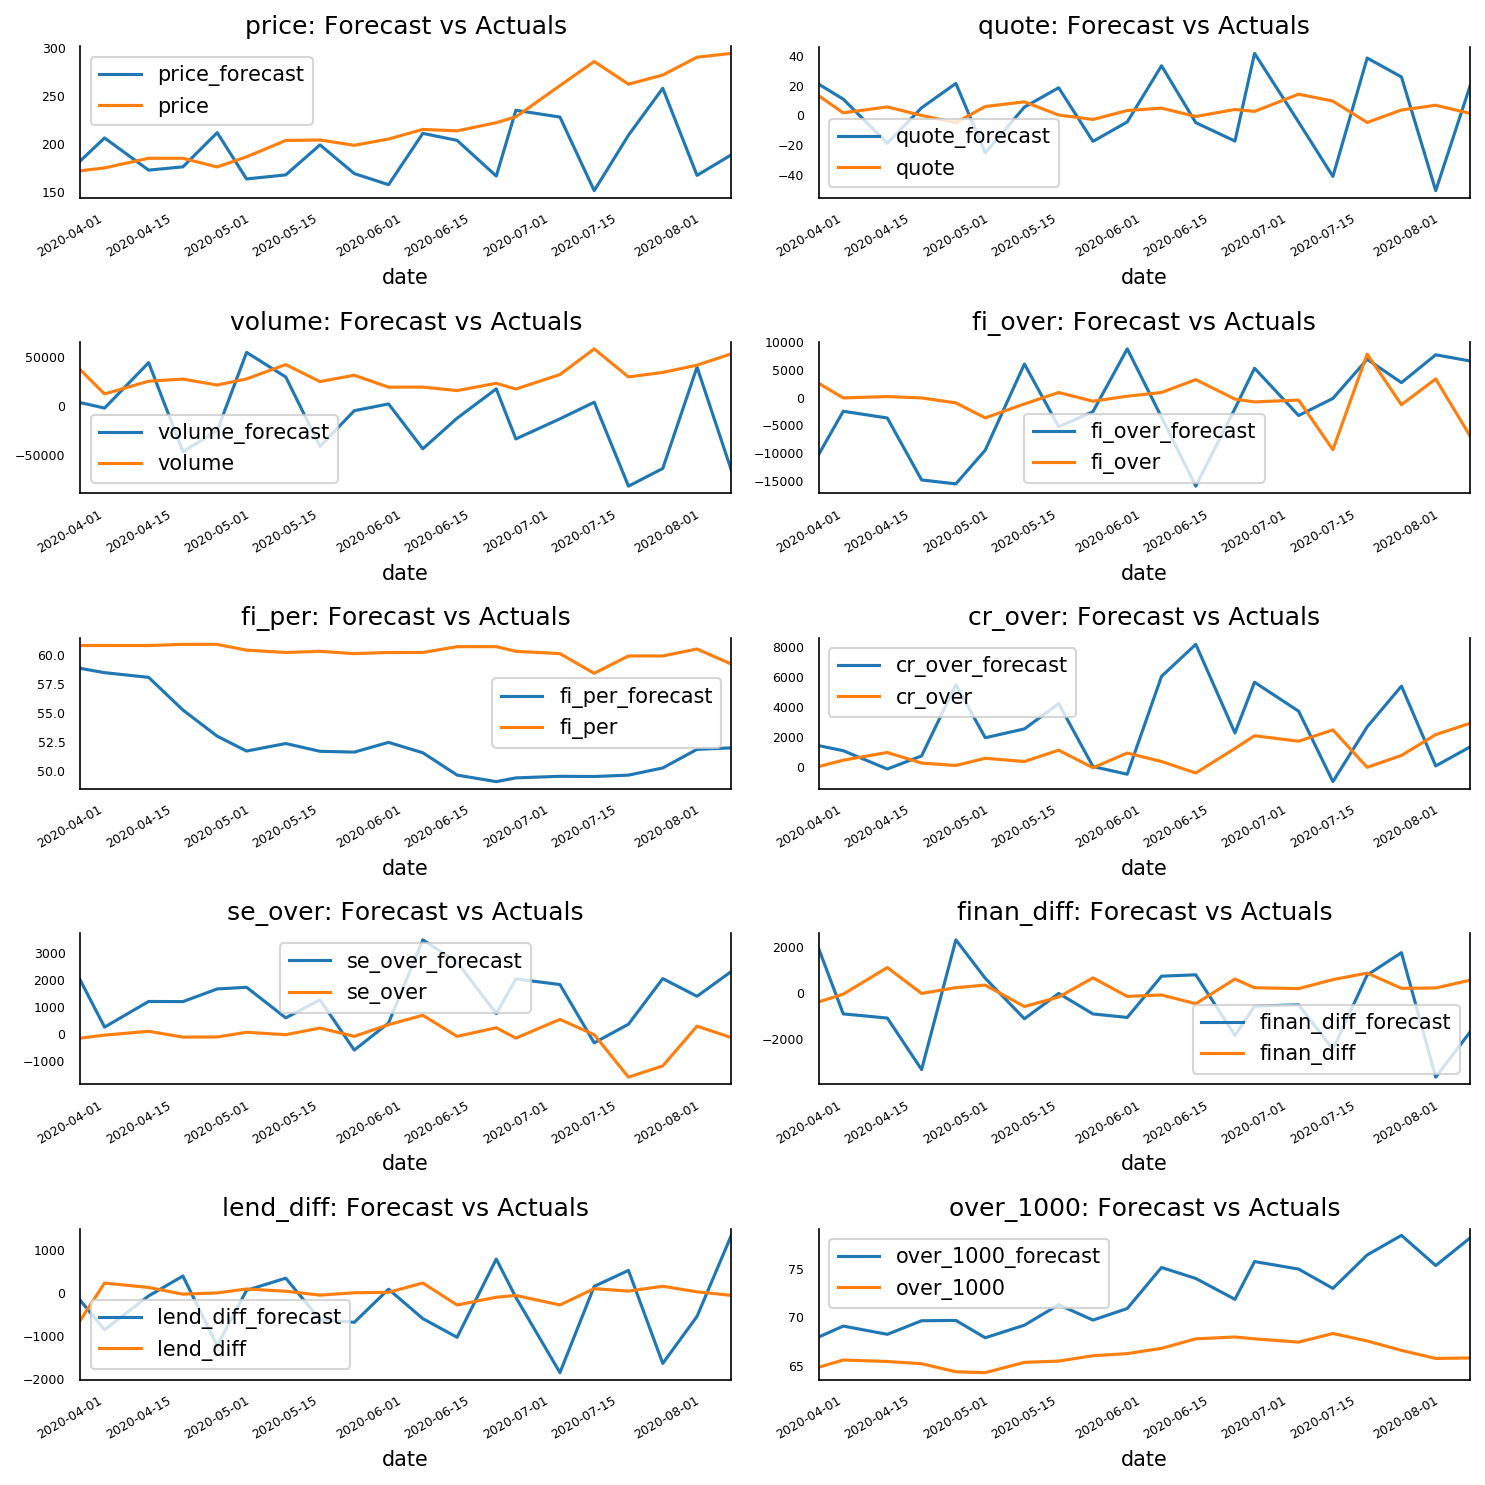

In [17]:
fig, axes= plt.subplots(nrows=int(len(df1.columns)/2), ncols=2, dpi=150, figsize=(10, 10))
for i, (col, ax) in enumerate(zip(df1.columns, axes.flatten())):
    df_result[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x', tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col+ ': Forecast vs Actuals')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();